In [279]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [229]:
#Importing Required Libraries 
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import time
import random

In [284]:
#Reading CSV File (Dataset)
df = pd.read_csv("/content/DataSetA.csv", error_bad_lines=False,header=None) 
df.head()

<ipython-input-284-911a2b62a71d>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/DataSetA.csv", error_bad_lines=False,header=None)
b'Skipping line 12: expected 7 fields, saw 9\nSkipping line 14: expected 7 fields, saw 9\nSkipping line 20: expected 7 fields, saw 8\nSkipping line 26: expected 7 fields, saw 8\nSkipping line 37: expected 7 fields, saw 9\nSkipping line 38: expected 7 fields, saw 9\nSkipping line 43: expected 7 fields, saw 8\nSkipping line 45: expected 7 fields, saw 8\nSkipping line 46: expected 7 fields, saw 8\nSkipping line 50: expected 7 fields, saw 10\nSkipping line 51: expected 7 fields, saw 9\nSkipping line 53: expected 7 fields, saw 10\nSkipping line 59: expected 7 fields, saw 9\nSkipping line 63: expected 7 fields, saw 12\nSkipping line 67: expected 7 fields, saw 8\nSkipping line 72: expected 7 fields, saw 8\nSkipping line 74: expected 7 fields, 

,0,1,2,3,4,5,6
0,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,NaN
1,Ghee,Coffee Powder,NaN,NaN,NaN,NaN,NaN
2,Lassi,Tea Powder,Butter,Cheese,NaN,NaN,NaN
3,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,NaN
4,Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,NaN


In [285]:
#Finding Size of the data
df.shape

(8732, 7)

In [286]:
#Converting dataframe into List of list
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i,j]) for j in range(len(df.columns))])
transactions = [[elem for elem in inner_list if elem != 'nan'] for inner_list in transactions]

In [287]:
#Writing function for Sampling
def improved_apriori_sampling(database, sample_size, confidence_level, min_support):
    start_time = time.time() #to measure the time complexicity
    n = len(database)
    s = sample_size
    c = confidence_level
   
    #Taking s random samples from database
    sample = random.sample(database, s)

    #Applying the apriori algorithm on sample
    frequent_itemsets = apriori(sample, min_support=min_support,min_confidence=c)
    
    end_time = time.time()
    execution_time = end_time - start_time
    key=0
    for rule in frequent_itemsets:
      key=key+1
    # Return the execution_time and key genrated
    return execution_time*1000,key

In [288]:
#Writing function for Partitioning
def improved_apriori_partitioning(database, num_partitions, min_support):
    start_time = time.time()
    # Divide the database into k partitions.
    partition_size = len(database) // num_partitions
    partitions = [database[i:i+partition_size] for i in range(0, len(database), partition_size)]
    
    # Apply the Apriori algorithm independently to each partition to find the frequent itemsets.
    frequent_itemsets = []
    for partition in partitions:
        frequent_itemsets += apriori(partition, min_support=min_support)

    end_time = time.time()
    execution_time = end_time - start_time
    key=0
    rule1=[]
    for rule in frequent_itemsets:
      if(rule1!=rule):        #To avoid repetation of key generated
        rule1=rule
        key=key+1
    
    # Return the execution_time and key genrated
    return execution_time*1000,key/num_partitions


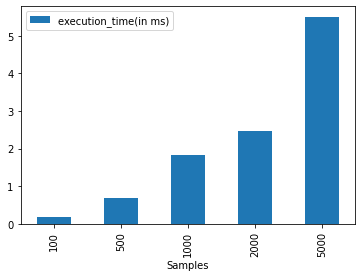

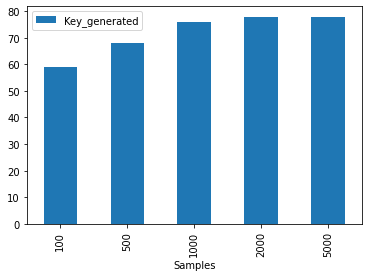

In [289]:
#Performance analysis with different number of samples for confidence_level=0.30 and min_support=0.10
t1,k1=improved_apriori_sampling(transactions,100,0.30,0.10)
t2,k2=improved_apriori_sampling(transactions,500,0.30,0.10)
t3,k3=improved_apriori_sampling(transactions,1000,0.30,0.10)
t4,k4=improved_apriori_sampling(transactions,2000,0.30,0.10)
t5,k5=improved_apriori_sampling(transactions,5000,0.30,0.10)
df = pd.DataFrame({
    "Samples":['100','500','1000','2000','5000'],
    "execution_time(in ms)": [t1,t2,t3,t4,t5],
    "Key_generated": [k1,k2,k3,k4,k5],
})
df.plot(x='Samples', y=['execution_time(in ms)'], kind='bar')
plt.show()
df.plot(x='Samples', y=[ 'Key_generated'], kind='bar')
plt.show()

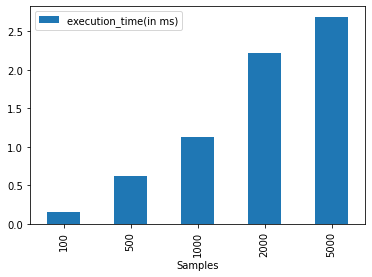

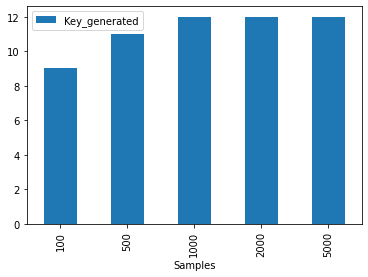

In [290]:
#Performance analysis with different number of samples for confidence_level=0.30 and min_support=0.30
t1,k1=improved_apriori_sampling(transactions,100,0.30,0.30)
t2,k2=improved_apriori_sampling(transactions,500,0.30,0.30)
t3,k3=improved_apriori_sampling(transactions,1000,0.30,0.30)
t4,k4=improved_apriori_sampling(transactions,2000,0.30,0.30)
t5,k5=improved_apriori_sampling(transactions,5000,0.30,0.30)
df = pd.DataFrame({
    "Samples":['100','500','1000','2000','5000'],
    "execution_time(in ms)": [t1,t2,t3,t4,t5],
    "Key_generated": [k1,k2,k3,k4,k5],
})
df.plot(x='Samples', y=['execution_time(in ms)'], kind='bar')
plt.show()
df.plot(x='Samples', y=[ 'Key_generated'], kind='bar')
plt.show()

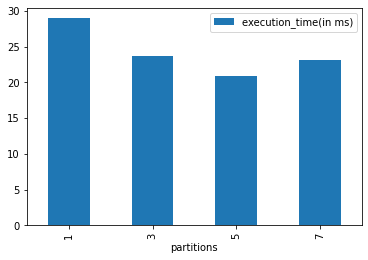

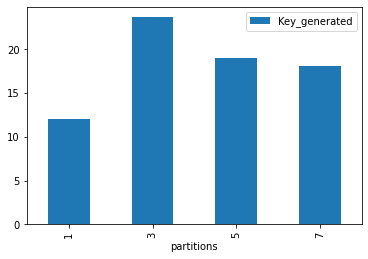

In [291]:
#performance analysis with different partitions with min support 0.30
tp1,kp1=improved_apriori_partitioning(transactions, 1 ,0.3)
tp2,kp2=improved_apriori_partitioning(transactions, 3 ,0.3)
tp3,kp3=improved_apriori_partitioning(transactions, 5 ,0.3)
tp4,kp4=improved_apriori_partitioning(transactions, 7 ,0.3)
df = pd.DataFrame({
    "partitions":['1','3','5','7'],
    "execution_time(in ms)": [tp1,tp2,tp3,tp4],
    "Key_generated": [kp1,kp2,kp3,kp4],
})
df.plot(x='partitions', y=['execution_time(in ms)'], kind='bar')
plt.show()
df.plot(x='partitions', y=['Key_generated'], kind='bar')
plt.show()

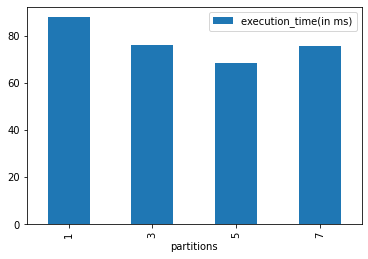

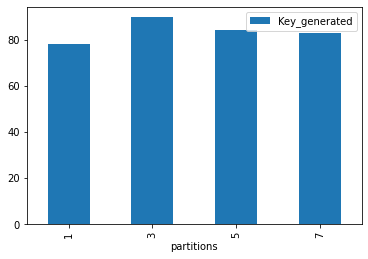

In [292]:
#performance analysis with different partitions with min support 0.10
tp1,kp1=improved_apriori_partitioning(transactions, 1 ,0.1)
tp2,kp2=improved_apriori_partitioning(transactions, 3 ,0.1)
tp3,kp3=improved_apriori_partitioning(transactions, 5 ,0.1)
tp4,kp4=improved_apriori_partitioning(transactions, 7 ,0.1)
df = pd.DataFrame({
    "partitions":['1','3','5','7'],
    "execution_time(in ms)": [tp1,tp2,tp3,tp4],
    "Key_generated": [kp1,kp2,kp3,kp4],
})
df.plot(x='partitions', y=['execution_time(in ms)'], kind='bar')
plt.show()
df.plot(x='partitions', y=['Key_generated'], kind='bar')
plt.show()